<a href="https://colab.research.google.com/github/purohitamann/market-anomaly-detection/blob/master/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_auc_score


In [ ]:

df = pd.read_csv('/content/FinancialMarketData.csv')

# Quick overview
print(df.shape)
df.head()


(1111, 44)


,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [ ]:
df.rename(columns={'Data': 'date'}, inplace=True)

In [ ]:
df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [ ]:
df.head()

,Y,date,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [ ]:
print(df['Y'].value_counts())



Y
0    874
1    237
Name: count, dtype: int64


In [ ]:
df.rename(columns={'Y':'isCrash'}, inplace=True)

In [ ]:
df.head()

,isCrash,date,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [ ]:
df['isCrash'].value_counts()

,count
isCrash,
0,874
1,237


In [ ]:
df.dropna()

,isCrash,date,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,3/23/2021,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,0,3/30/2021,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,0,4/6/2021,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,0,4/13/2021,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   isCrash    1111 non-null   int64  
 1   date       1111 non-null   object 
 2   XAU BGNL   1111 non-null   float64
 3   ECSURPUS   1111 non-null   float64
 4   BDIY       1111 non-null   float64
 5   CRY        1111 non-null   float64
 6   DXY        1111 non-null   float64
 7   JPY        1111 non-null   float64
 8   GBP        1111 non-null   float64
 9   Cl1        1111 non-null   float64
 10  VIX        1111 non-null   float64
 11  USGG30YR   1111 non-null   float64
 12  GT10       1111 non-null   float64
 13  USGG2YR    1111 non-null   float64
 14  USGG3M     1111 non-null   float64
 15  US0001M    1111 non-null   float64
 16  GTDEM30Y   1111 non-null   float64
 17  GTDEM10Y   1111 non-null   float64
 18  GTDEM2Y    1111 non-null   float64
 19  EONIA      1111 non-null   float64
 20  GTITL30Y

In [ ]:
df['VIX_MA_50'] = df['VIX'].rolling(window=50).mean()

In [ ]:
df['VIX_MA_50']

,VIX_MA_50
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1106,26.7636
1107,26.4006
1108,25.8548
1109,25.5164


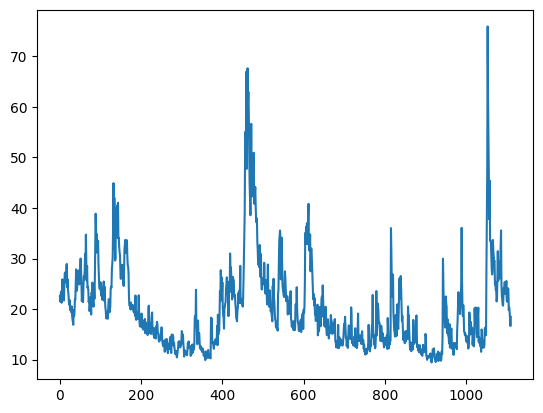

In [ ]:
plt.plot(df['VIX'], label='VIX')

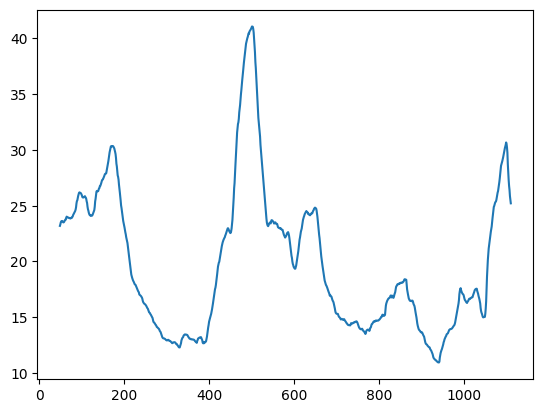

In [ ]:
plt.plot(df['VIX_MA_50'], label='50-day MA')

In [ ]:
df['VIX_dev'] = df['VIX'] - df['VIX_MA_50']

In [ ]:
df['VIX_dev']

,VIX_dev
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1106,-6.4636
1107,-6.7906
1108,-7.7348
1109,-8.8664


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:

target = df['isCrash']
feature = df.drop('isCrash', axis=1)

In [ ]:
feature['date'] = pd.to_datetime(feature['date'])
feature['Date_numeric'] = feature['date'].map(pd.Timestamp.toordinal)
feature = feature.drop('date', axis=1)

In [ ]:

feature.drop('VIX_MA_50',axis=1)
feature.drop('VIX_dev',axis=1)
feature.dropna()

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,VIX_MA_50,VIX_dev,Date_numeric
49,269.80,-0.307,1588.0,195.6300,113.210,112.48,1.4640,29.33,27.17,5.4730,...,1242.73,131.70,815.57,757.35,151.25,181.78,23.94,23.1922,3.9778,730473
50,274.90,-0.298,1598.0,194.5200,110.310,113.65,1.4790,26.64,28.73,5.4320,...,1246.34,126.39,810.45,729.45,152.58,165.42,22.25,23.3168,5.4132,730480
51,269.80,-0.218,1599.0,192.9200,108.610,114.50,1.4990,27.21,29.99,5.3420,...,1216.76,127.20,809.54,761.09,155.16,175.24,22.58,23.4866,6.5034,730487
52,267.60,-0.430,1593.0,195.8200,109.520,116.67,1.4890,27.64,27.99,5.4290,...,1233.25,125.89,803.34,819.00,161.56,180.12,24.00,23.5860,4.4040,730494
53,263.30,-0.434,1579.0,198.5300,110.110,117.37,1.4680,30.29,25.28,5.5960,...,1259.71,126.11,801.73,812.25,180.05,176.28,24.83,23.6226,1.6574,730501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,20.30,2.3264,...,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83,26.7636,-6.4636,737872
1107,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,19.61,2.3687,...,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80,26.4006,-6.7906,737879
1108,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,18.12,2.3230,...,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92,25.8548,-7.7348,737886
1109,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,16.65,2.2939,...,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40,25.5164,-8.8664,737893


In [ ]:
feature.dropna()

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,VIX_MA_50,VIX_dev,Date_numeric
49,269.80,-0.307,1588.0,195.6300,113.210,112.48,1.4640,29.33,27.17,5.4730,...,1242.73,131.70,815.57,757.35,151.25,181.78,23.94,23.1922,3.9778,730473
50,274.90,-0.298,1598.0,194.5200,110.310,113.65,1.4790,26.64,28.73,5.4320,...,1246.34,126.39,810.45,729.45,152.58,165.42,22.25,23.3168,5.4132,730480
51,269.80,-0.218,1599.0,192.9200,108.610,114.50,1.4990,27.21,29.99,5.3420,...,1216.76,127.20,809.54,761.09,155.16,175.24,22.58,23.4866,6.5034,730487
52,267.60,-0.430,1593.0,195.8200,109.520,116.67,1.4890,27.64,27.99,5.4290,...,1233.25,125.89,803.34,819.00,161.56,180.12,24.00,23.5860,4.4040,730494
53,263.30,-0.434,1579.0,198.5300,110.110,117.37,1.4680,30.29,25.28,5.5960,...,1259.71,126.11,801.73,812.25,180.05,176.28,24.83,23.6226,1.6574,730501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,20.30,2.3264,...,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83,26.7636,-6.4636,737872
1107,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,19.61,2.3687,...,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80,26.4006,-6.7906,737879
1108,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,18.12,2.3230,...,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92,25.8548,-7.7348,737886
1109,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,16.65,2.2939,...,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40,25.5164,-8.8664,737893


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X_train,X_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=42)
scaler = StandardScaler()


In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# Check for NaN values in y_train
print(y_train.isnull().sum())

# Drop rows with NaN in y_train (if NaNs are few)
X_train = X_train[y_train.notna()]
y_train = y_train.dropna()


0


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
iso_forest = IsolationForest(
    n_estimators=100,       # Number of trees
    max_samples='auto',     # Default: subset size = min(256, len(X))
    contamination=0.1,      # Approximate proportion of outliers
    random_state=42
)


In [ ]:
iso_forest.fit(X_train,y_train)


IsolationForest(contamination=0.1, random_state=42)

In [ ]:
# Predict anomalies on the same dataset or new data
predictions = iso_forest.predict(X_test_scaled)  # Predict anomalies

# Convert to 0 (normal) and 1 (anomalies) for clarity
predictions = [1 if pred == -1 else 0 for pred in predictions]


In [ ]:
len(predictions)

223

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[160  17]
 [ 44   2]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       177
           1       0.11      0.04      0.06        46

    accuracy                           0.73       223
   macro avg       0.44      0.47      0.45       223
weighted avg       0.64      0.73      0.68       223



In [ ]:

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,predictions)

0.726457399103139

In [ ]:
#  model.fit(X_train,y_train)
#   y_pred = model.predict(X_test)
#   accuracy = accuracy_score(y_test,y_pred)
#   print(f"{model.__class__.__name__} Acccuracy: {accuracy:.4f}")
#   print(f"\nClassification Report:\n{classification_report(y_test,y_pred)}")
#   print("-------")



Improving the model by selecting the correct features like 🇰
: VIX, LIBOR, MSCI indices, credit spreads, yield spreads, and rolling volatilities.

creating features like : Returns, spreads, and volatility features.

Increase contamination (e.g., 0.2 or 0.3) so the model a higher proportion of anomalies. This should help it flag more potential crashes (at the risk of more false positives).

In [ ]:
iso_forest = IsolationForest(
    n_estimators=300,
    max_samples='auto',
    contamination=0.2,
    random_state=42
)



In [ ]:
df.head()

,isCrash,date,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,VIX_MA_50,VIX_dev
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30,NaN,NaN
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74,NaN,NaN
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46,NaN,NaN
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29,NaN,NaN
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32,NaN,NaN


In [ ]:
# Add new features to capture market behavior

# Example: Rolling Volatility (requires a time series column)
if 'VIX' in df.columns:
    df['VIX_Rolling_Vol'] = df['VIX'].rolling(window=30).std()

# Example: Returns (for price-like columns such as indices, gold)
for col in ['MSCI_USA', 'MSCI_EUROPE', 'Gold_Spot']:
    if col in df.columns:
        df[f'{col}_Return'] = df[col].pct_change()  # Percentage change (log return optional)

# Example: Yield Spread
if 'USGG10YR' in df.columns and 'USGG2YR' in df.columns:
    df['Yield_Spread'] = df['USGG10YR'] - df['USGG2YR']

# Example: Credit Spread
if 'LF98TRUU' in df.columns and 'USGG10YR' in df.columns:
    df['Credit_Spread'] = df['LF98TRUU'] - df['USGG10YR']

# Drop rows with NaNs created during rolling or percentage change operations
df = df.dropna()

# Update the feature matrix
X = df.drop(columns=['isCrash', 'date'])
y = df['isCrash']  # Only for evaluation
X_scaled = scaler.fit_transform(X)


In [ ]:
df.head()

,isCrash,date,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,VIX_MA_50,VIX_dev,VIX_Rolling_Vol
49,1,12/19/2000,269.8,-0.307,1588.0,195.63,113.21,112.48,1.464,29.33,...,1242.73,131.70,815.57,757.35,151.25,181.78,23.94,23.1922,3.9778,3.217095
50,1,12/26/2000,274.9,-0.298,1598.0,194.52,110.31,113.65,1.479,26.64,...,1246.34,126.39,810.45,729.45,152.58,165.42,22.25,23.3168,5.4132,3.421656
51,1,1/2/2001,269.8,-0.218,1599.0,192.92,108.61,114.50,1.499,27.21,...,1216.76,127.20,809.54,761.09,155.16,175.24,22.58,23.4866,6.5034,3.690676
52,0,1/9/2001,267.6,-0.430,1593.0,195.82,109.52,116.67,1.489,27.64,...,1233.25,125.89,803.34,819.00,161.56,180.12,24.00,23.5860,4.4040,3.811901
53,0,1/16/2001,263.3,-0.434,1579.0,198.53,110.11,117.37,1.468,30.29,...,1259.71,126.11,801.73,812.25,180.05,176.28,24.83,23.6226,1.6574,3.818185


In [ ]:
iso_forest.fit(X_scaled)

# Predict anomalies
# -1 = anomaly, 1 = normal
predictions = iso_forest.predict(X_scaled)

# Convert predictions to 0 (normal) and 1 (anomaly) for clarity
y_pred = np.where(predictions == -1, 1, 0)

Confusion Matrix:
 [[721 121]
 [128  92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       842
           1       0.43      0.42      0.42       220

    accuracy                           0.77      1062
   macro avg       0.64      0.64      0.64      1062
weighted avg       0.76      0.77      0.76      1062



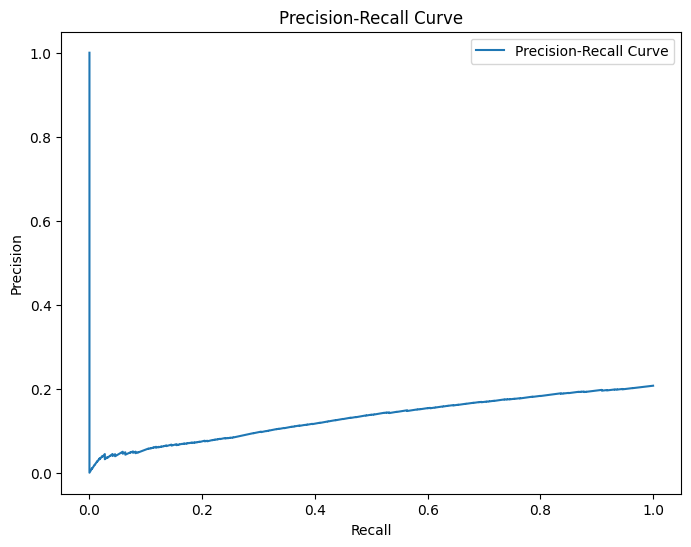

Precision-Recall AUC: 0.23


In [ ]:
# If ground truth labels (CrashLabel) are available
if 'isCrash' in df.columns:
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
    print("\nClassification Report:\n", classification_report(y, y_pred))

    # Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(y, iso_forest.decision_function(X_scaled))
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label="Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.show()

    # AUC for Precision-Recall
    auc_pr = roc_auc_score(y, iso_forest.decision_function(X_scaled))
    print(f"Precision-Recall AUC: {auc_pr:.2f}")


Using SMOTEto remove the imbalance

In [ ]:
# Ensure all features are numeric
X_train = pd.get_dummies(X_train, drop_first=True)


ValueError: Data must be 1-dimensional, got ndarray of shape (888, 45) instead

In [ ]:
print("Feature shape:", feature.shape)
print("Target shape:", target.shape)


Feature shape: (1111, 45)
Target shape: (1111,)


In [ ]:
# Combine feature and target into one DataFrame
data = pd.concat([feature, target], axis=1)

# Drop rows with missing values
data.dropna(inplace=True)

# Separate back into feature and target
feature = data.iloc[:, :-1]  # All columns except the last one
target = data.iloc[:, -1]    # The last column


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Step 1: Handle missing values
feature.fillna(feature.mean(), inplace=True)  # Impute missing values
target.dropna(inplace=True)  # Ensure target is non-null

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    feature, target, test_size=0.2, random_state=42
)

# Step 3: Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", pd.Series(y_resampled).value_counts())


Class distribution before SMOTE: isCrash
0    667
1    182
Name: count, dtype: int64
Class distribution after SMOTE: isCrash
0    667
1    667
Name: count, dtype: int64


In [ ]:
iso_forest = IsolationForest( n_estimators=800,

    max_samples=0.8,contamination=0.2, random_state=42)
iso_forest.fit(X_train, y_train)


# Predict anomalies
# -1 = anomaly, 1 = normal
predictions = iso_forest.predict(X_test)

# Convert predictions to 0 (normal) and 1 (anomaly) for clarity
y_pred = np.where(predictions == -1, 1, 0)

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       175
           1       0.43      0.53      0.47        38

    accuracy                           0.79       213
   macro avg       0.66      0.69      0.67       213
weighted avg       0.81      0.79      0.80       213



 indicate that the original data distribution is more representative of the real-world scenario, and oversampling (via SMOTE) could be introducing noise or artificial patterns.

In [ ]:
iso_forest = IsolationForest( n_estimators=100,
                    max_features=0.8,
    max_samples='auto',contamination=0.1, random_state=42)
iso_forest.fit(X_train, y_train)


# Predict anomalies
# -1 = anomaly, 1 = normal
predictions = iso_forest.predict(X_test)

# Convert predictions to 0 (normal) and 1 (anomaly) for clarity
y_pred = np.where(predictions == -1, 1, 0)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       175
           1       0.42      0.21      0.28        38

    accuracy                           0.81       213
   macro avg       0.63      0.57      0.58       213
weighted avg       0.77      0.81      0.78       213



In [ ]:
iso_forest = IsolationForest(
    n_estimators=800,
    max_samples='auto',
    contamination=0.4,
    max_features=0.8,
    bootstrap=False,
    n_jobs=-1,
    random_state=42
)
iso_forest.fit(X_train, y_train)


# Predict anomalies
# -1 = anomaly, 1 = normal
predictions = iso_forest.predict(X_test)

# Convert predictions to 0 (normal) and 1 (anomaly) for clarity
y_pred = np.where(predictions == -1, 1, 0)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.65      0.77       175
           1       0.34      0.82      0.48        38

    accuracy                           0.68       213
   macro avg       0.64      0.73      0.62       213
weighted avg       0.83      0.68      0.72       213



In [ ]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
iso_forest = IsolationForest(
    n_estimators=1000,
    max_samples='auto',
    contamination=0.4,
    max_features=0.8,
    bootstrap=False,
    n_jobs=-1,
    random_state=42
)
iso_forest.fit(X_train, y_train)


# Predict anomalies
# -1 = anomaly, 1 = normal
predictions = iso_forest.predict(X_test)

# Convert predictions to 0 (normal) and 1 (anomaly) for clarity
y_pred = np.where(predictions == -1, 1, 0)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.66      0.78       175
           1       0.34      0.82      0.48        38

    accuracy                           0.69       213
   macro avg       0.64      0.74      0.63       213
weighted avg       0.84      0.69      0.73       213



In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, precision_recall_curve, auc
import numpy as np

# Step 1: Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize Models
iso_forest = IsolationForest(n_estimators=500, contamination=0.2, random_state=42)
one_class_svm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.2)  # nu ~ contamination
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.2, novelty=True)  # novelty=True allows LOF to work on test data

# Step 3: Fit Models
iso_forest.fit(X_train_scaled)
one_class_svm.fit(X_train_scaled)
lof.fit(X_train_scaled)

# Step 4: Get Predictions
iso_pred = iso_forest.predict(X_test_scaled)  # -1 = anomaly, 1 = normal
svm_pred = one_class_svm.predict(X_test_scaled)  # -1 = anomaly, 1 = normal
lof_pred = lof.predict(X_test_scaled)  # -1 = anomaly, 1 = normal

# Step 5: Combine Predictions (Voting)
ensemble_pred = np.mean([iso_pred, svm_pred, lof_pred], axis=0)
ensemble_pred = np.where(ensemble_pred < 0, 1, 0)  # Convert to 0 (normal) and 1 (anomaly)

# Step 6: Evaluate
print("Classification Report:")
print(classification_report(y_test, ensemble_pred))

# Precision-Recall Curve
scores = iso_forest.decision_function(X_test_scaled)  # Using Isolation Forest scores as an example
precision, recall, thresholds = precision_recall_curve(y_test, scores)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       175
           1       0.38      0.42      0.40        38

    accuracy                           0.77       213
   macro avg       0.63      0.64      0.63       213
weighted avg       0.78      0.77      0.78       213

Precision-Recall AUC: 0.11


Statistical Analysis and Model Selection



*   Exploratory Data Analysis (EDA).
*   Correlation and Feature Selection.
*   Evaluation of Statistical Properties.
*   Model Selection and Implementation.








In [ ]:
# Check for missing values
missing_values = feature.isnull().sum()
print("Missing values per feature:\n", missing_values)


Missing values per feature:
 XAU BGNL        0
ECSURPUS        0
BDIY            0
CRY             0
DXY             0
JPY             0
GBP             0
Cl1             0
VIX             0
USGG30YR        0
GT10            0
USGG2YR         0
USGG3M          0
US0001M         0
GTDEM30Y        0
GTDEM10Y        0
GTDEM2Y         0
EONIA           0
GTITL30YR       0
GTITL10YR       0
GTITL2YR        0
GTJPY30YR       0
GTJPY10YR       0
GTJPY2YR        0
GTGBP30Y        0
GTGBP20Y        0
GTGBP2Y         0
LUMSTRUU        0
LMBITR          0
LUACTRUU        0
LF98TRUU        0
LG30TRUU        0
LP01TREU        0
EMUSTRUU        0
LF94TRUU        0
MXUS            0
MXEU            0
MXJP            0
MXBR            0
MXRU            0
MXIN            0
MXCN            0
VIX_MA_50       0
VIX_dev         0
Date_numeric    0
dtype: int64


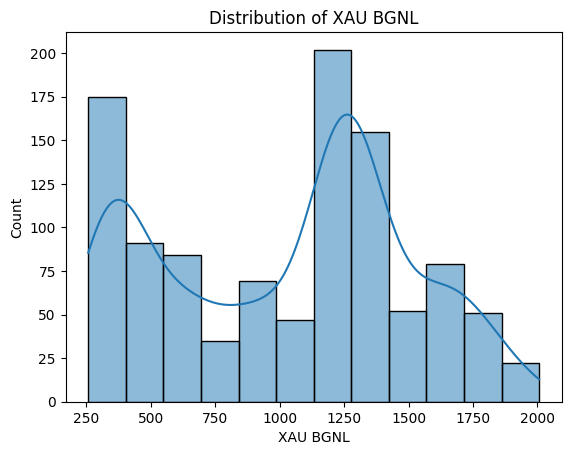

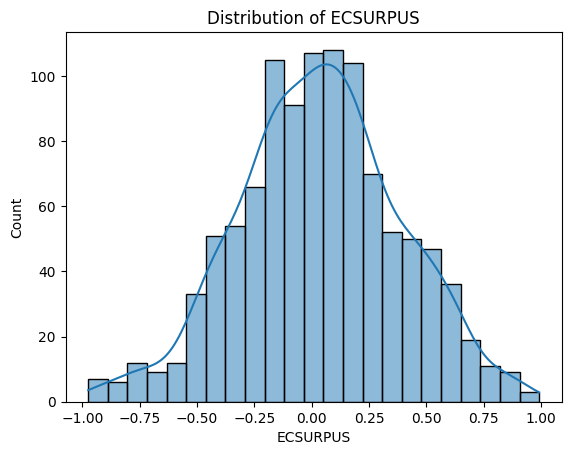

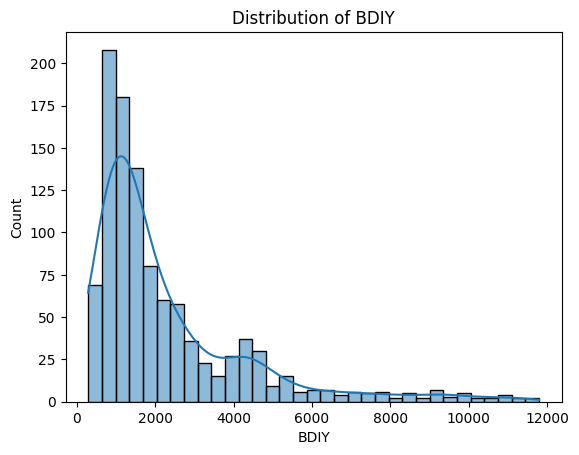

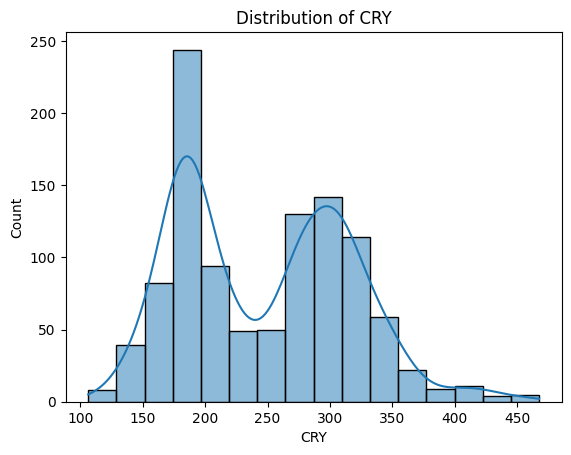

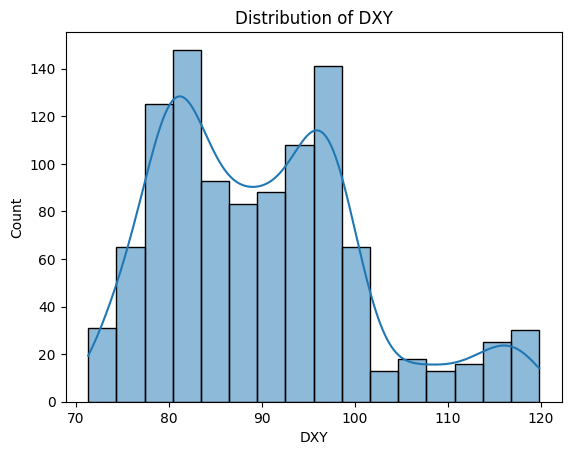

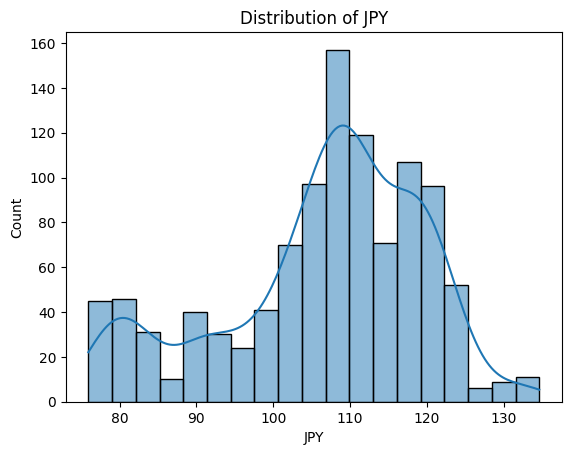

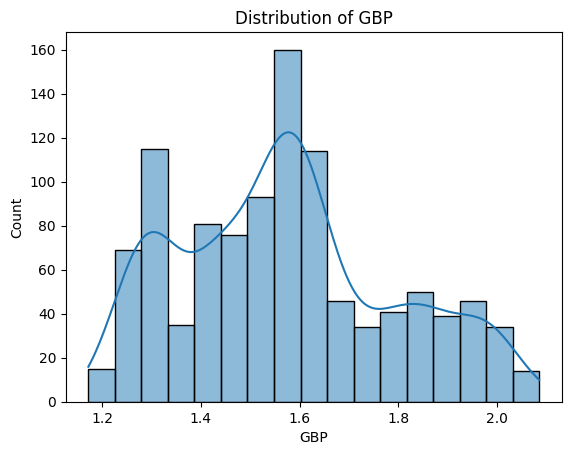

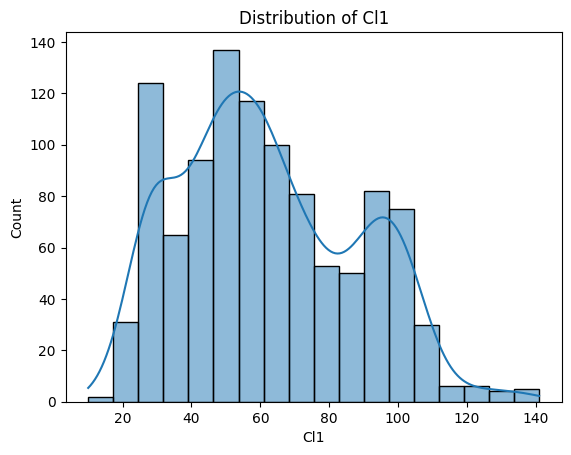

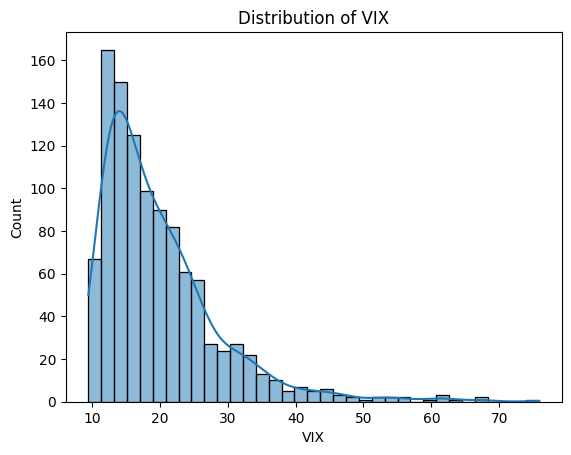

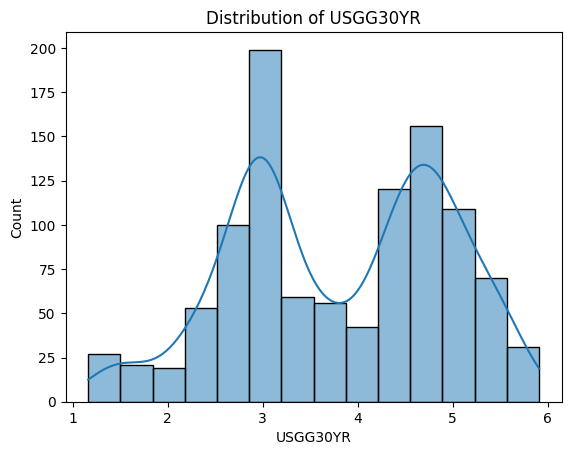

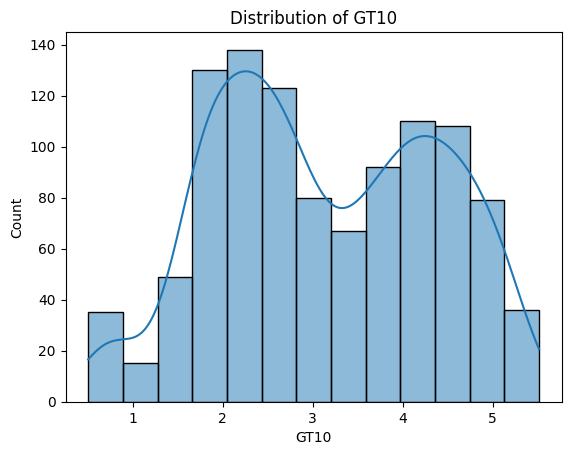

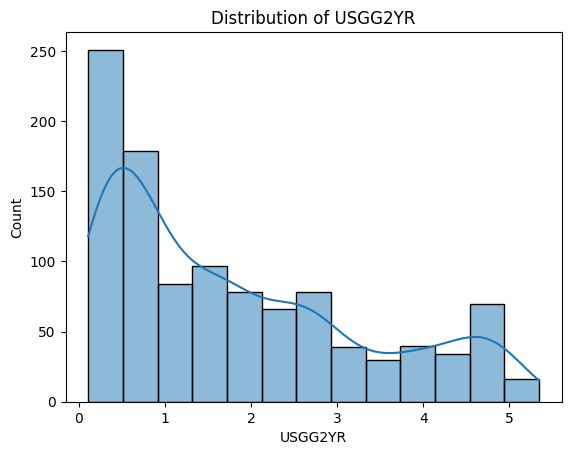

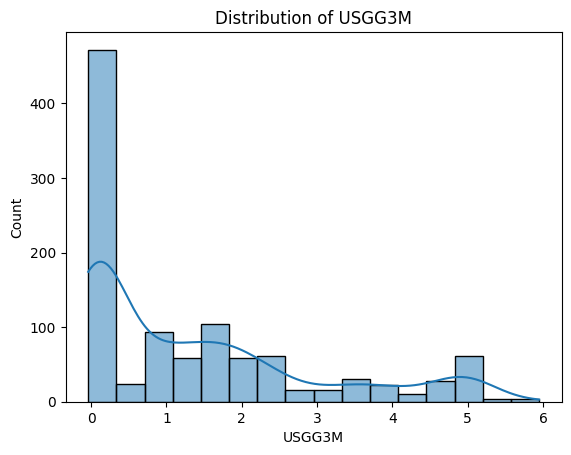

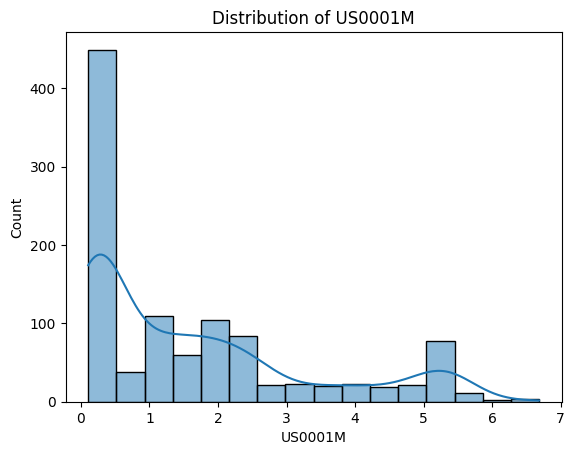

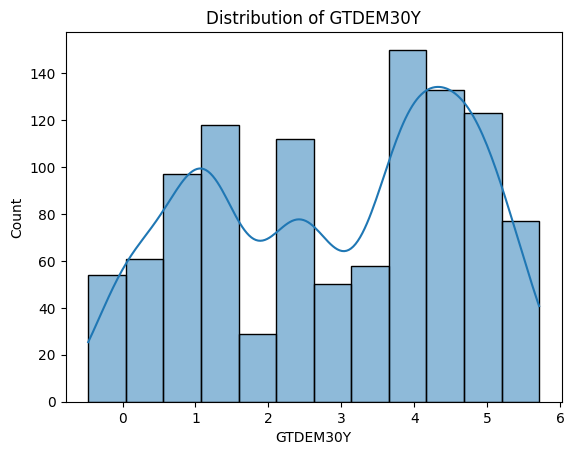

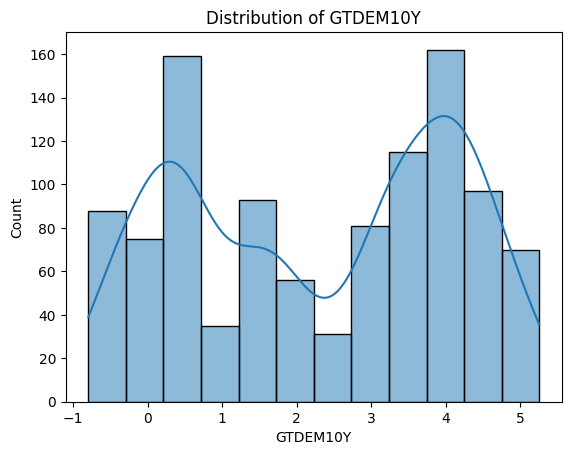

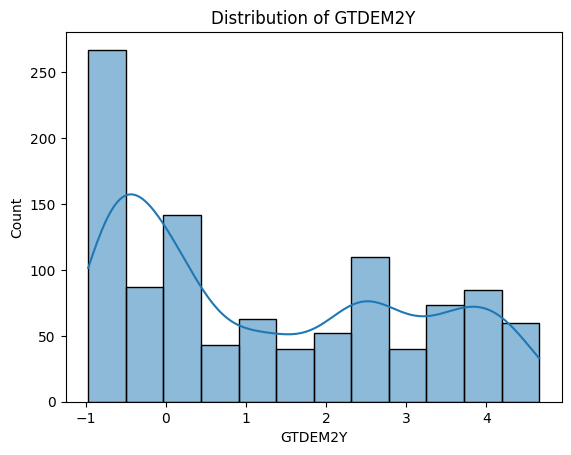

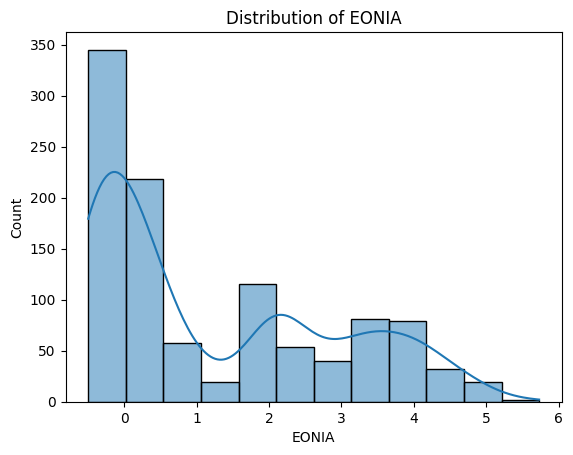

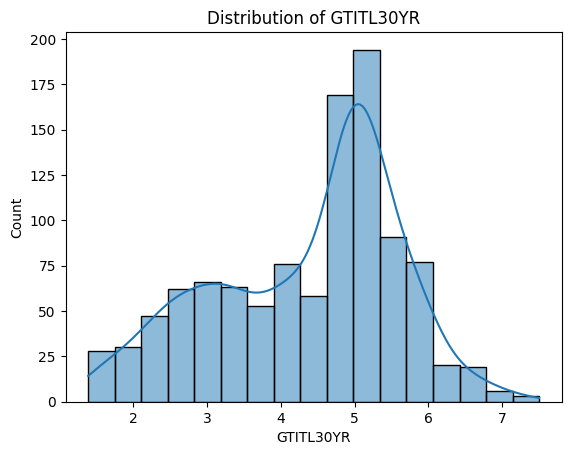

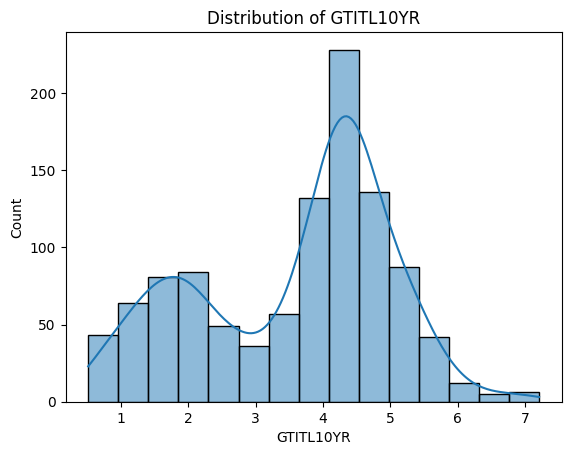

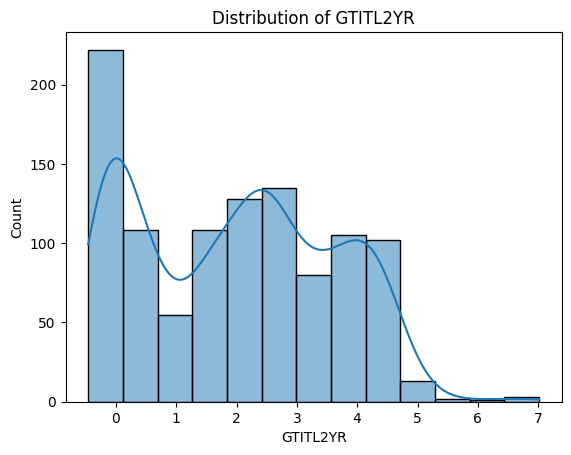

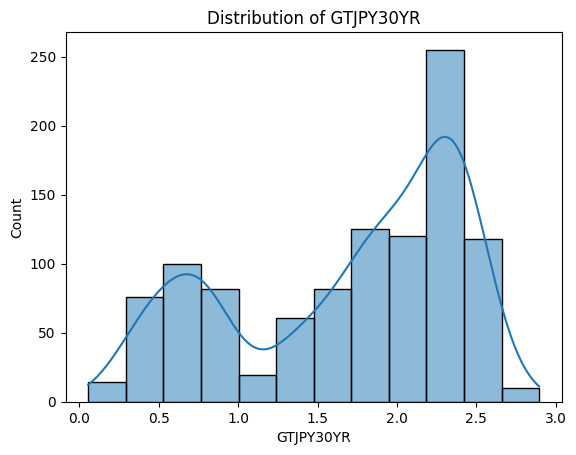

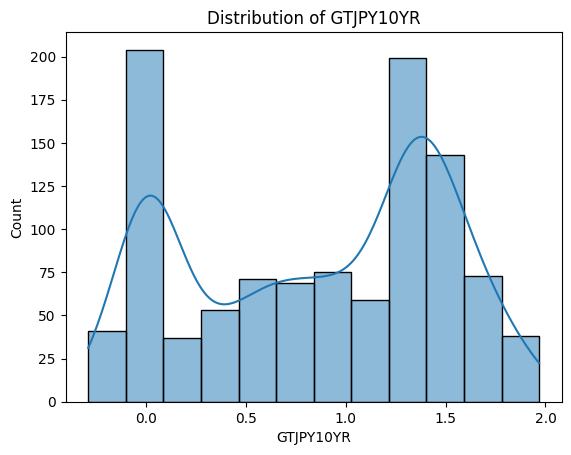

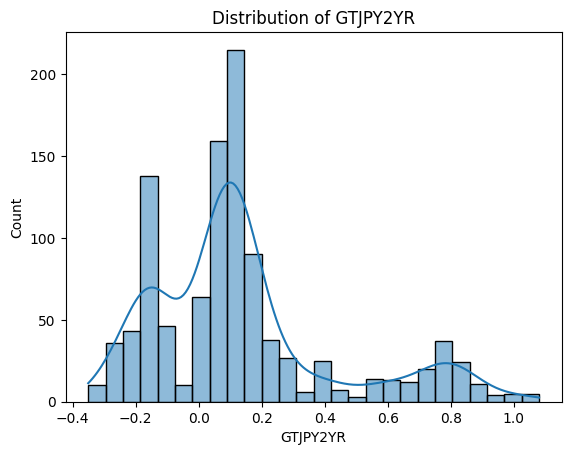

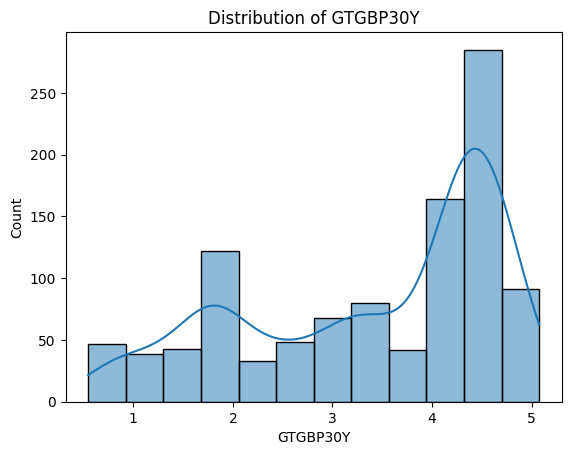

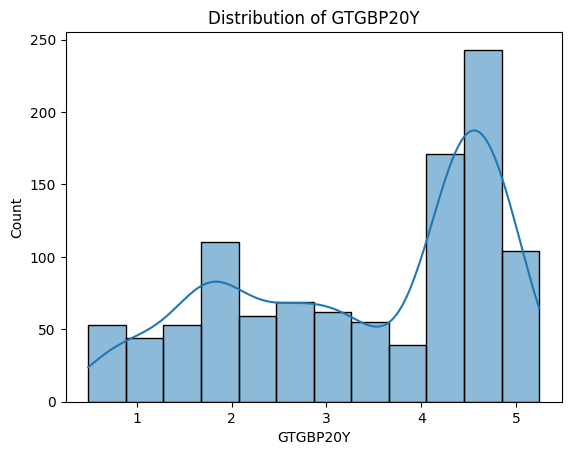

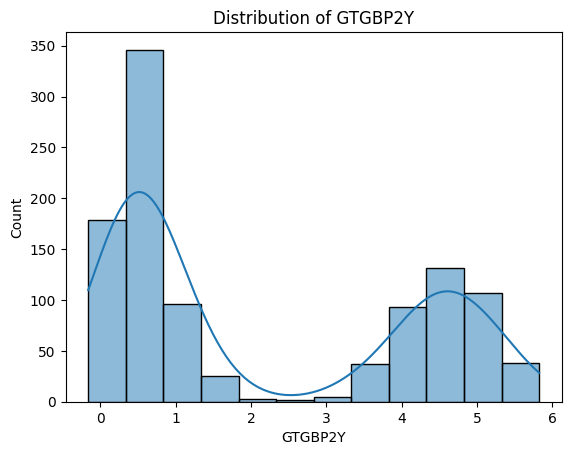

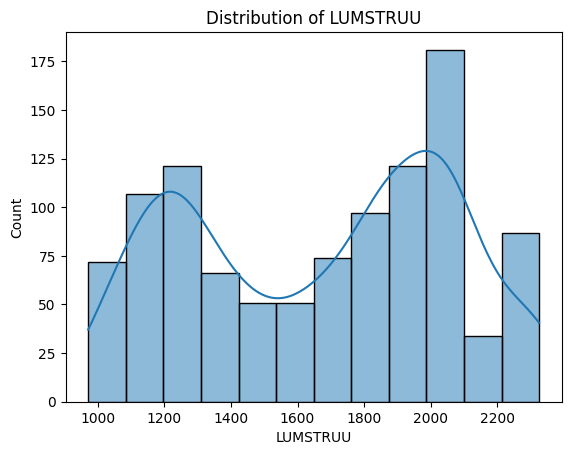

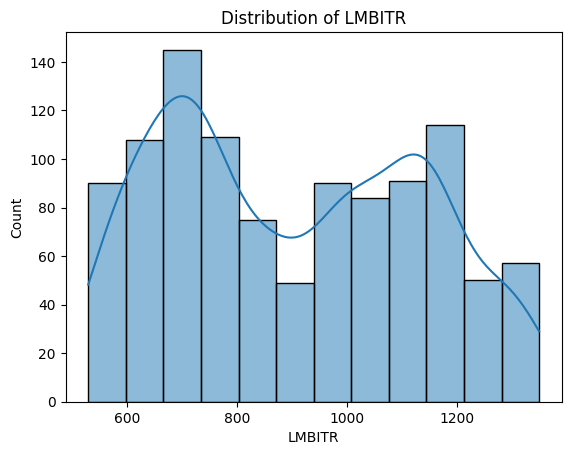

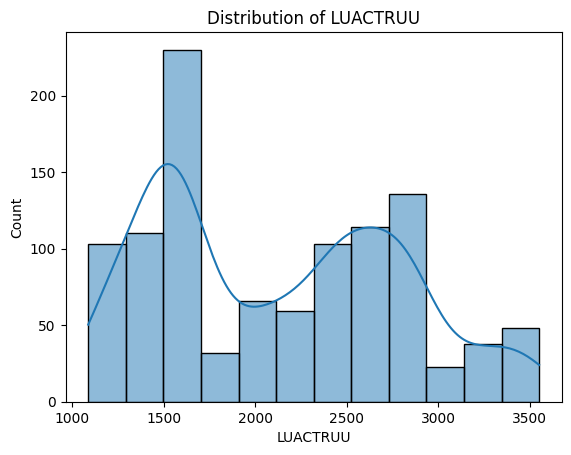

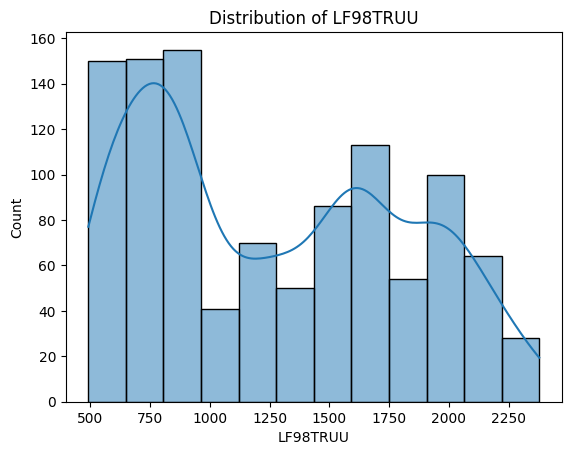

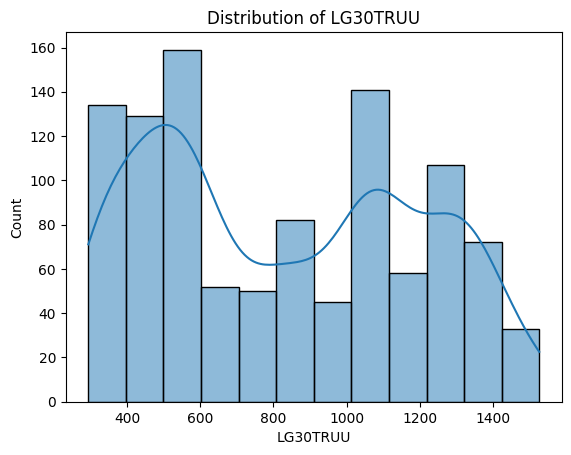

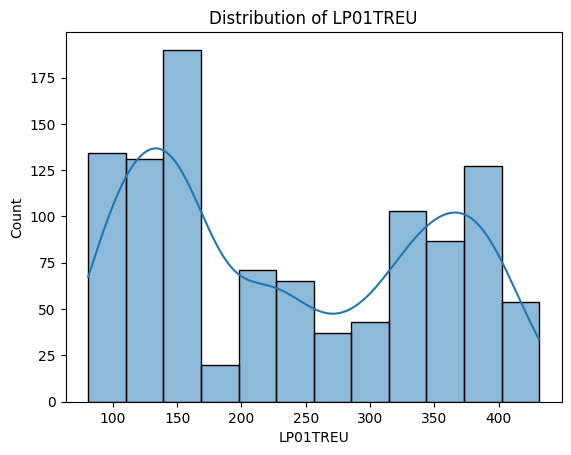

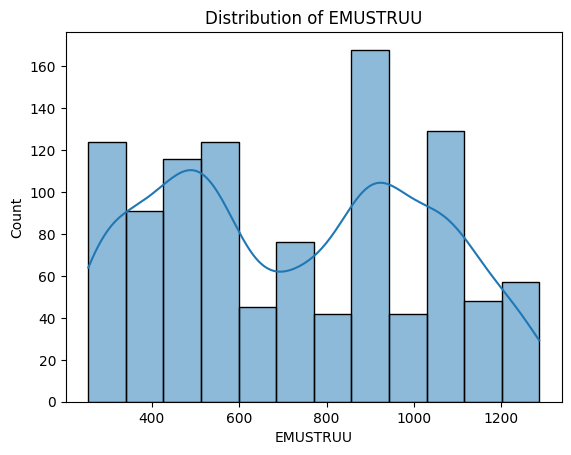

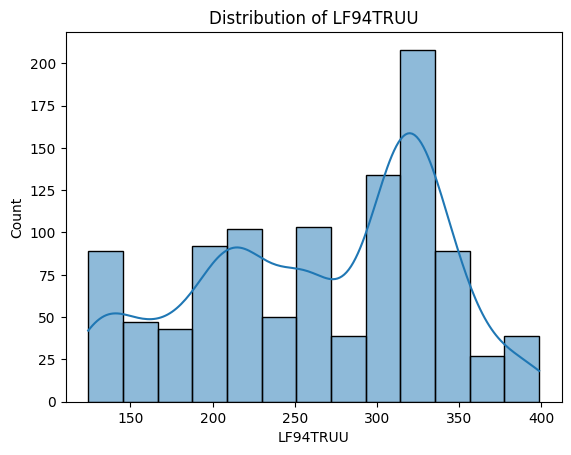

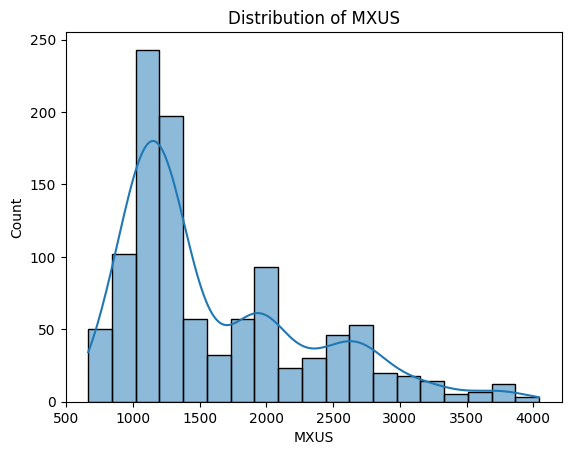

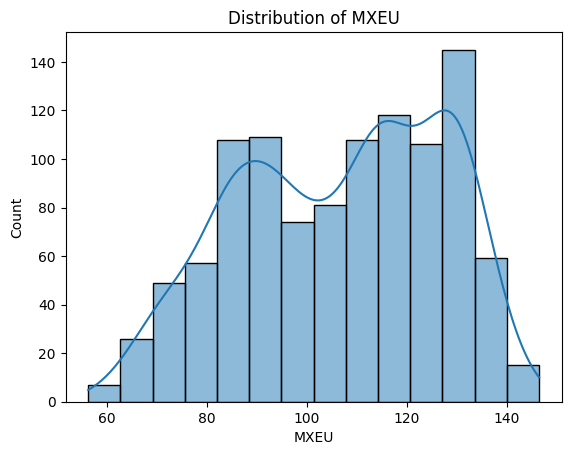

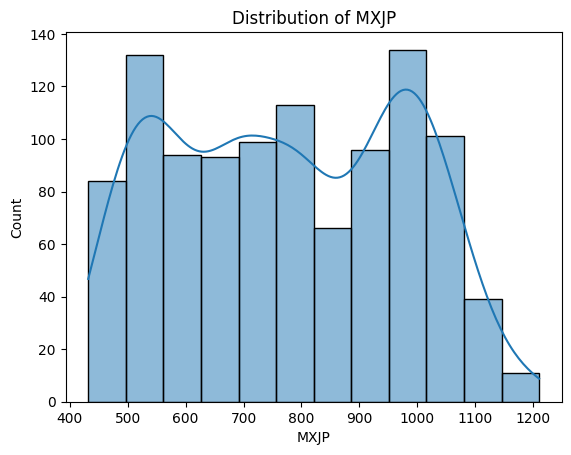

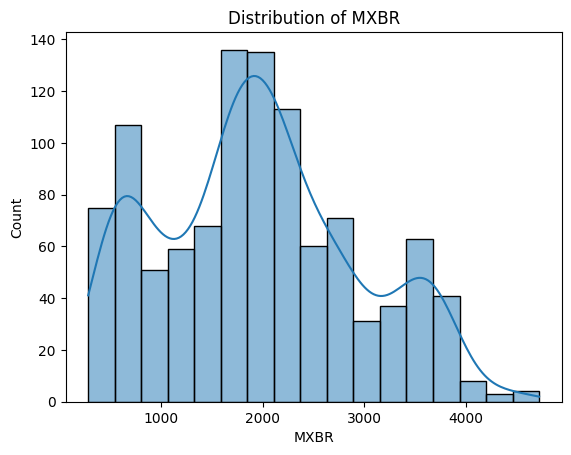

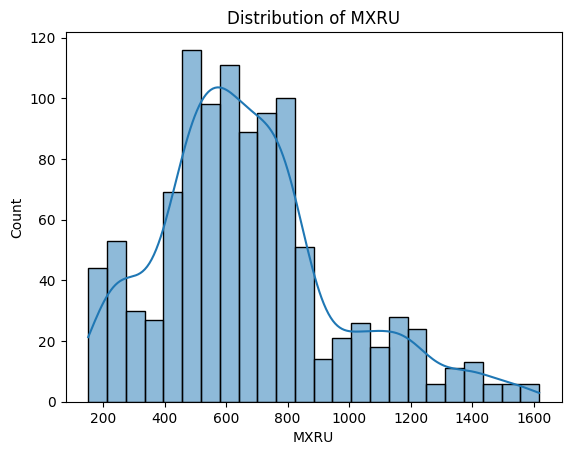

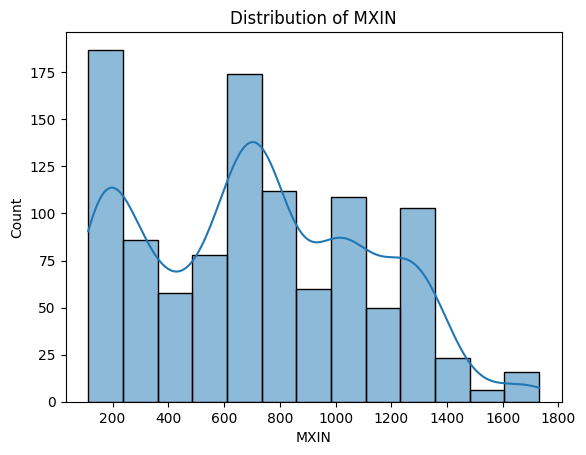

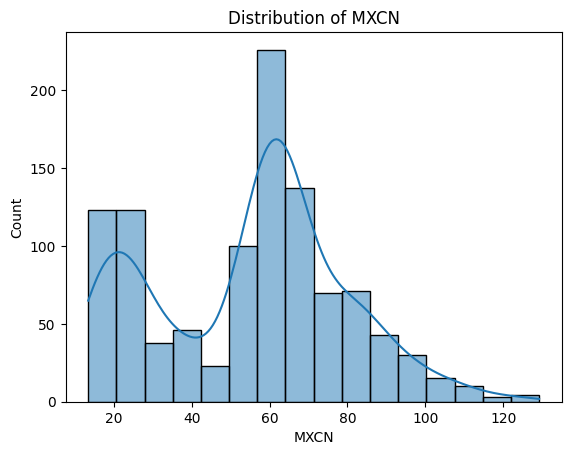

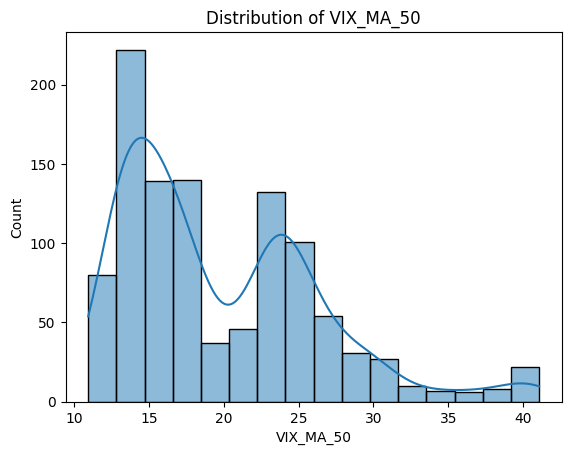

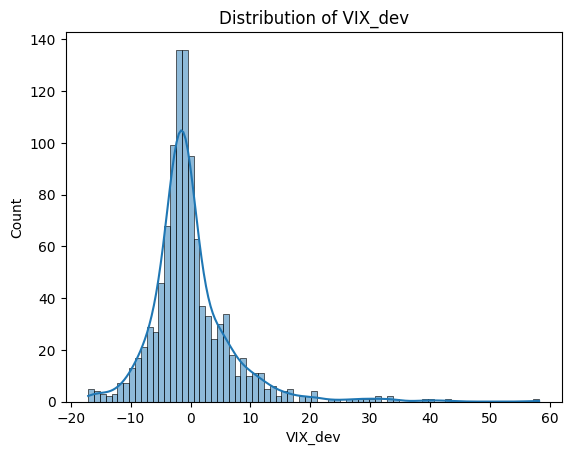

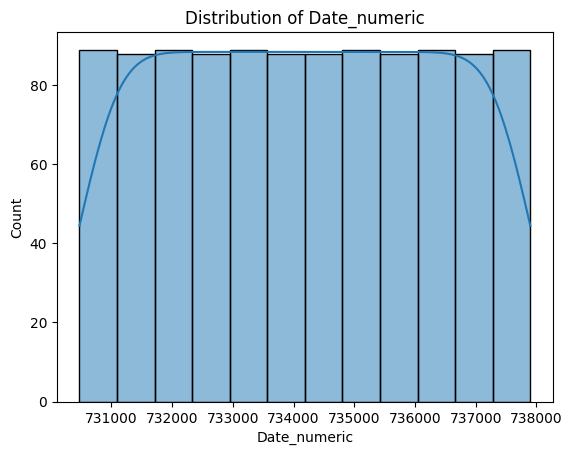

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature distributions
for col in feature.columns:
    sns.histplot(feature[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


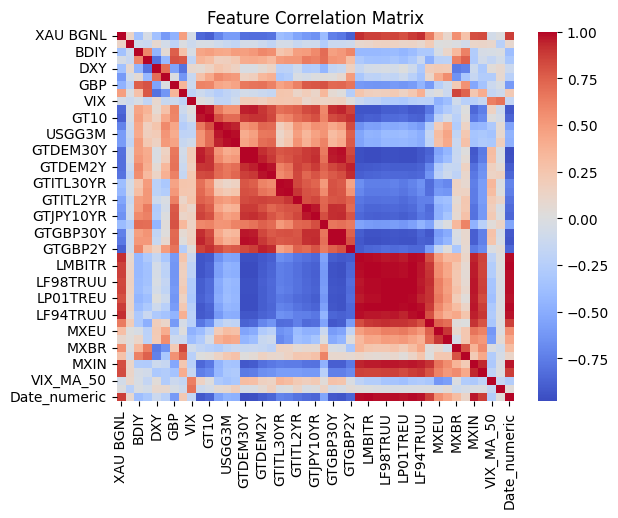

In [ ]:
# Compute correlation matrix
correlation_matrix = feature.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()


educe multicollinearity by removing redundant features while retaining as much information as possible.

In [ ]:
correlation_matrix

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,VIX_MA_50,VIX_dev,Date_numeric
XAU BGNL,1.000000,0.130086,-0.354184,-0.048161,-0.360682,-0.600310,-0.463249,0.475827,-0.054958,-0.855208,...,0.637363,0.294279,0.097515,0.551011,0.272940,0.818585,0.822386,-0.070599,-0.002894,0.870725
ECSURPUS,0.130086,1.000000,-0.101629,-0.135018,0.082101,-0.071007,-0.199566,-0.008276,-0.105618,-0.031459,...,0.197280,0.008829,0.024260,-0.009275,-0.075812,0.111735,0.126413,0.103193,-0.230552,0.093619
BDIY,-0.354184,-0.101629,1.000000,0.595789,-0.450066,0.064191,0.758292,0.278622,-0.040446,0.450902,...,-0.306402,-0.040102,0.118169,0.331447,0.615694,-0.268165,-0.048842,-0.039127,-0.014214,-0.384407
CRY,-0.048161,-0.135018,0.595789,1.000000,-0.802022,-0.417942,0.804933,0.775832,-0.179019,0.363776,...,-0.482497,-0.218152,-0.206275,0.625548,0.752199,-0.275627,-0.076227,-0.160946,-0.074438,-0.310878
DXY,-0.360682,0.082101,-0.450066,-0.802022,1.000000,0.691215,-0.560753,-0.808630,0.094690,0.067304,...,0.182535,0.219163,0.206230,-0.765080,-0.731391,-0.106899,-0.303656,0.037099,0.084614,-0.115885
JPY,-0.600310,-0.071007,0.064191,-0.417942,0.691215,1.000000,-0.007110,-0.624424,-0.137281,0.275010,...,0.117508,0.406729,0.565082,-0.653977,-0.316235,-0.150143,-0.271914,-0.269785,0.080776,-0.232616
GBP,-0.463249,-0.199566,0.758292,0.804933,-0.560753,-0.007110,1.000000,0.352905,-0.121997,0.612838,...,-0.602447,-0.241119,-0.109699,0.218283,0.541355,-0.537188,-0.350854,-0.119977,-0.041031,-0.604184
Cl1,0.475827,-0.008276,0.278622,0.775832,-0.808630,-0.624424,0.352905,1.000000,-0.201785,-0.112185,...,-0.048132,0.012801,-0.120857,0.852923,0.742026,0.234962,0.399710,-0.165805,-0.098608,0.224228
VIX,-0.054958,-0.105618,-0.040446,-0.179019,0.094690,-0.137281,-0.121997,-0.201785,1.000000,0.021920,...,-0.235125,-0.468168,-0.390599,-0.082982,-0.236552,-0.232372,-0.151165,0.622817,0.675991,-0.167560
USGG30YR,-0.855208,-0.031459,0.450902,0.363776,0.067304,0.275010,0.612838,-0.112185,0.021920,1.000000,...,-0.782623,-0.393458,-0.278946,-0.182716,0.010316,-0.850097,-0.745511,0.145635,-0.109497,-0.923552


In [ ]:
threshold = 0.9
correlated_features = set()
for i in range(correlation_matrix.shape[0]):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Drop the highly correlated features
feature = feature.drop(columns=correlated_features)
for i in correlated_features:
    print(i, "removed!")

USGG3M removed!
GTDEM30Y removed!
Date_numeric removed!
LF98TRUU removed!
US0001M removed!
GT10 removed!
GTDEM10Y removed!
LUMSTRUU removed!
MXCN removed!
LF94TRUU removed!
LG30TRUU removed!
MXIN removed!
GTGBP20Y removed!
EMUSTRUU removed!
GTJPY10YR removed!
GTGBP2Y removed!
EONIA removed!
MXUS removed!
GTITL10YR removed!
GTGBP30Y removed!
LUACTRUU removed!
LMBITR removed!
GTDEM2Y removed!
LP01TREU removed!


In [ ]:
len(feature.columns)

21

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest:\n", classification_report(y_test, y_pred))


Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       175
           1       0.83      0.76      0.79        38

    accuracy                           0.93       213
   macro avg       0.89      0.86      0.88       213
weighted avg       0.93      0.93      0.93       213



In [ ]:
from sklearn.feature_selection import f_classif

f_scores, p_values = f_classif(X_train, y_train)
feature_importance = pd.DataFrame({"Feature": feature.columns, "F-Score": f_scores, "P-Value": p_values})
print(feature_importance.sort_values(by="F-Score", ascending=False))


      Feature     F-Score       P-Value
8         VIX  497.357293  4.848106e-87
20    VIX_dev  230.804759  2.809012e-46
12   GTITL2YR  102.576355  7.792924e-23
19  VIX_MA_50  102.469021  8.178802e-23
16       MXJP   93.723193  4.282542e-21
11  GTITL30YR   92.859970  6.343363e-21
15       MXEU   85.809653  1.593542e-19
5         JPY   33.089780  1.228868e-08
14   GTJPY2YR   13.700876  2.282146e-04
13  GTJPY30YR   11.325928  7.987048e-04
18       MXRU    8.411064  3.825922e-03
10    USGG2YR    6.353385  1.189843e-02
6         GBP    5.083174  2.441381e-02
1    ECSURPUS    4.612532  3.202227e-02
2        BDIY    3.656570  5.618558e-02
4         DXY    2.119798  1.457762e-01
3         CRY    0.991064  3.197667e-01
0    XAU BGNL    0.866266  3.522564e-01
7         Cl1    0.288469  5.913442e-01
17       MXBR    0.114154  7.355477e-01
9    USGG30YR    0.068546  7.935289e-01


In [ ]:
import pickle
filename = "random-forest.pkl"
model = rf
with open(filename,"wb") as file:
  pickle.dump(model,file)

  print(f"Model saved as {filename}")

Model saved as random-forest.pkl


In [ ]:
iso_forest = IsolationForest(
    n_estimators=1000,
    max_samples='auto',
    contamination=0.2,
    max_features=0.8,
    bootstrap=False,
    n_jobs=-1,
    random_state=42
)
iso_forest.fit(X_train, y_train)


# Predict anomalies
# -1 = anomaly, 1 = normal
predictions = iso_forest.predict(X_test)

# Convert predictions to 0 (normal) and 1 (anomaly) for clarity
y_pred = np.where(predictions == -1, 1, 0)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       175
           1       0.47      0.53      0.49        38

    accuracy                           0.81       213
   macro avg       0.68      0.70      0.69       213
weighted avg       0.82      0.81      0.81       213



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [91]:
rf = RandomForestClassifier( random_state=42,max_depth= None, min_samples_leaf=1, min_samples_split= 5, n_estimators=800)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest:\n", classification_report(y_test, y_pred))

Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       175
           1       0.88      0.76      0.82        38

    accuracy                           0.94       213
   macro avg       0.91      0.87      0.89       213
weighted avg       0.94      0.94      0.94       213



In [93]:
import pickle
filename = "randomForest.pkl"
model = rf
with open(filename,"wb") as file:
  pickle.dump(model,file)

  print(f"Model saved as {filename}")

Model saved as randomForest.pkl


In [90]:
rf = RandomForestClassifier( random_state=42,max_depth= None, min_samples_leaf=1, min_samples_split= 8, n_estimators=900)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest:\n", classification_report(y_test, y_pred))

Random Forest:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       175
           1       0.90      0.71      0.79        38

    accuracy                           0.93       213
   macro avg       0.92      0.85      0.88       213
weighted avg       0.93      0.93      0.93       213



In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train Logistic Regression with increased max_iter and regularization
lr = LogisticRegression(solver='saga', penalty='l2', max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

# Step 3: Evaluate the model
y_pred = lr.predict(X_test_scaled)
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       175
           1       0.81      0.68      0.74        38

    accuracy                           0.92       213
   macro avg       0.87      0.82      0.85       213
weighted avg       0.91      0.92      0.91       213



In [100]:
# Initialize models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.neural_network import MLPClassifier
import xgboost as xgb
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate evaluation metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    results[name] = {
        "Precision (Class 1)": report["1"]["precision"],
        "Recall (Class 1)": report["1"]["recall"],
        "F1-Score (Class 1)": report["1"]["f1-score"],
        "ROC-AUC": auc
    }
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    if auc is not None:
        print(f"ROC-AUC: {auc:.4f}")
    print("-" * 50)


Training Logistic Regression...
Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       175
           1       0.81      0.68      0.74        38

    accuracy                           0.92       213
   macro avg       0.87      0.82      0.85       213
weighted avg       0.91      0.92      0.91       213

ROC-AUC: 0.8865
--------------------------------------------------
Training Random Forest...
Model: Random Forest
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       175
           1       0.83      0.76      0.79        38

    accuracy                           0.93       213
   macro avg       0.89      0.86      0.88       213
weighted avg       0.93      0.93      0.93       213

ROC-AUC: 0.9477
--------------------------------------------------
Training Gradient Boosting...
Model: Gradient Boosting
              precision    recall  f1-score   suppo

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:06:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       175
           1       0.86      0.79      0.82        38

    accuracy                           0.94       213
   macro avg       0.91      0.88      0.89       213
weighted avg       0.94      0.94      0.94       213

ROC-AUC: 0.9352
--------------------------------------------------


In [101]:
import pandas as pd

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("Model Comparison:")
print(results_df)

# Sort by F1-Score or ROC-AUC
sorted_results = results_df.sort_values(by="F1-Score (Class 1)", ascending=False)
print("Sorted Results:")
print(sorted_results)


Model Comparison:
                        Precision (Class 1)  Recall (Class 1)  \
Logistic Regression                0.812500          0.684211   
Random Forest                      0.828571          0.763158   
Gradient Boosting                  0.833333          0.657895   
Support Vector Machine             0.923077          0.631579   
K-Nearest Neighbors                0.818182          0.710526   
Naive Bayes                        0.461538          0.789474   
Neural Network                     0.833333          0.789474   
XGBoost                            0.857143          0.789474   

                        F1-Score (Class 1)   ROC-AUC  
Logistic Regression               0.742857  0.886466  
Random Forest                     0.794521  0.947669  
Gradient Boosting                 0.735294  0.924662  
Support Vector Machine            0.750000  0.919098  
K-Nearest Neighbors               0.760563  0.925639  
Naive Bayes                       0.582524  0.867068  
Neural Netw

In [102]:
import pickle

# Save Random Forest
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(models["Random Forest"], f)

# Save Neural Network
with open('neural_network_model.pkl', 'wb') as f:
    pickle.dump(models["Neural Network"], f)

# Save XGBoost
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(models["XGBoost"], f)

print("Models saved successfully!")


Models saved successfully!
